In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import tensorflow.keras.initializers as initializers

In [40]:
df=pd.read_csv('../dataset/WISDM.csv', index_col=0)
df = df.drop(columns=['user-id', 'timestamp'])

df

,activity,X,Y,Z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164
...,...,...,...,...
1098199,Sitting,9.000000,-1.570000,1.690000
1098200,Sitting,9.040000,-1.460000,1.730000
1098201,Sitting,9.080000,-1.380000,1.690000
1098202,Sitting,9.000000,-1.460000,1.730000


In [41]:
df_sit = df[df['activity'] == 'Sitting']
df_run = df[df['activity'] == 'Jogging']

In [42]:
df_run

,activity,X,Y,Z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164
...,...,...,...,...
1080754,Jogging,-7.010000,-10.530000,0.570000
1080755,Jogging,-6.360000,-3.910000,-0.420000
1080756,Jogging,-11.260000,3.020000,1.570000
1080757,Jogging,-17.540000,4.670000,3.980000


In [43]:
df_sit_sample = df_sit.head(4500).copy()

In [44]:
df_sit_sample

,activity,X,Y,Z
221333,Sitting,2.60,9.66,1.035146
221334,Sitting,2.68,9.53,0.503953
221335,Sitting,3.49,8.89,0.762740
221336,Sitting,3.64,9.38,0.926184
221337,Sitting,2.91,9.34,1.035146
...,...,...,...,...
255294,Sitting,-4.33,-2.18,8.308413
255295,Sitting,-4.37,-2.22,8.349273
255296,Sitting,-4.29,-2.22,8.308413
255297,Sitting,-4.29,-2.22,8.281172


In [45]:
df_run_sample = df_run.head(4500).copy()

In [46]:
df_run_sample

,activity,X,Y,Z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164
...,...,...,...,...
13015,Jogging,5.434519,8.853226,3.909040
13016,Jogging,-4.331271,19.531578,-1.729784
13017,Jogging,-1.035146,-5.012288,-4.481094
13018,Jogging,7.082581,17.243360,-0.381370


In [47]:
data = pd.concat([df_sit_sample, df_run_sample])

In [48]:
data

,activity,X,Y,Z
221333,Sitting,2.600000,9.660000,1.035146
221334,Sitting,2.680000,9.530000,0.503953
221335,Sitting,3.490000,8.890000,0.762740
221336,Sitting,3.640000,9.380000,0.926184
221337,Sitting,2.910000,9.340000,1.035146
...,...,...,...,...
13015,Jogging,5.434519,8.853226,3.909040
13016,Jogging,-4.331271,19.531578,-1.729784
13017,Jogging,-1.035146,-5.012288,-4.481094
13018,Jogging,7.082581,17.243360,-0.381370


In [57]:
from sklearn.preprocessing import LabelEncoder



le=LabelEncoder()

data['activity']=le.fit_transform(data['activity'])

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 221333 to 13019
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   activity  9000 non-null   int32  
 1   X         9000 non-null   float64
 2   Y         9000 non-null   float64
 3   Z         9000 non-null   float64
dtypes: float64(3), int32(1)
memory usage: 316.4 KB


In [59]:
df_train, df_test = train_test_split(data, test_size=0.25, random_state=42)

In [60]:
df_train = df_train[df_train['activity']==0]

In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3368 entries, 7030 to 8313
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   activity  3368 non-null   int32  
 1   X         3368 non-null   float64
 2   Y         3368 non-null   float64
 3   Z         3368 non-null   float64
dtypes: float64(3), int32(1)
memory usage: 118.4 KB


In [62]:
x_train = df_train.drop(['activity'], axis=1)

y_test = df_test['activity']
x_test = df_test.drop(['activity'],axis=1)

In [63]:
x_train

,X,Y,Z
7030,6.319841,-0.272407,2.601486
8101,14.519291,18.809700,0.612916
12542,5.012288,15.976667,-2.751310
12887,1.879608,9.275456,2.260978
103,3.023717,7.164303,0.081722
...,...,...,...
7308,-5.407278,19.572440,-2.111154
6777,0.926184,5.788648,0.531194
5655,-0.694638,12.408136,10.841797
5854,-3.214402,-4.985047,-4.140586


In [64]:
y_test

11960     0
222495    1
221915    1
254880    1
12432     0
         ..
12757     0
253844    1
222740    1
221868    1
6019      0
Name: activity, Length: 2250, dtype: int32

In [65]:
x_test

,X,Y,Z
11960,-0.000000,-0.299648,-0.994285
222495,3.260000,9.300000,1.144109
221915,3.110000,9.300000,1.184970
254880,-4.250000,-2.300000,8.240311
12432,8.308413,18.768839,-0.612916
...,...,...,...
12757,4.140586,13.293459,-0.190685
253844,-4.820000,-2.220000,7.927042
222740,3.210000,9.280000,1.144109
221868,2.870000,9.380000,1.076008


In [66]:
# Normalize the above splits using the MinMaxScaler from the scikit learn package
#scaler = MinMaxScaler()

# Make sure to only fit the scaler on the training data
#x_train = scaler.fit_transform(x_train)

In [67]:
print(x_train.values)

[[  6.3198414   -0.27240697   2.6014864 ]
 [ 14.519291    18.8097       0.61291564]
 [  5.012288    15.976667    -2.7513103 ]
 ...
 [ -0.6946377   12.408136    10.841797  ]
 [ -3.214402    -4.9850473   -4.140586  ]
 [ -7.6273947   -9.084772   -10.228881  ]]


In [68]:
NUM_COL = 3

#Setting the Hyperparameters

#learning_rate = 0.00001
learning_rate = 0.001
batch_size = 128
epochs = 5
adam = Adam(learning_rate = learning_rate, beta_1 = 0.5)

In [69]:
# Defining the Generator network

def get_generator(optimizer):
    generator = Sequential()
    generator.add(Dense(128,activation='tanh', input_dim=NUM_COL, kernel_initializer=initializers.glorot_normal(seed=42)))
    
    generator.add(Dense(128,activation='tanh'))
    
    generator.add(Dense(64,activation='tanh'))
    
    generator.add(Dense(32,activation='tanh'))
    
    generator.add(Dense(16,activation='tanh'))
    
    generator.add(Dense(4,activation='tanh'))
    
    generator.add(Dense(NUM_COL, activation='tanh'))
    generator.compile(loss='mean_squared_error', optimizer=Adam(lr=0.002, beta_1=0.5))

    return generator

In [70]:
##### Defining the Discriminator network

def get_discriminator(optimizer):

    discriminator = Sequential()

    discriminator.add(Dense(16, activation='relu',input_dim=NUM_COL, kernel_initializer=initializers.glorot_normal(seed=42)))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(16, activation='relu'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(4, activation='relu'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(4, activation='relu'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(1, activation='sigmoid'))
   
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.002, beta_1=0.5))

    return discriminator

In [71]:
def get_gan_network(discriminator, generator, optimizer,input_dim=NUM_COL):

    discriminator.trainable = False   
    gan_input = Input(shape=(input_dim,))  
    x = generator(gan_input)        
    gan_output = discriminator(x)
    
    gan = Model(inputs=gan_input, outputs=gan_output)    
    gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.002, beta_1=0.5))
    
    
    return gan

In [72]:
#Training the GAN

#Calculating the number of batches based on the batch size
batch_count = x_train.shape[0] // batch_size
pbar = tqdm(total= epochs * batch_count)
gan_loss = []
discriminator_loss = []

#Inititalizing the network
generator = get_generator(adam)
discriminator = get_discriminator(adam)
gan = get_gan_network(discriminator, generator, adam,input_dim=NUM_COL)


for epoch in range(epochs):        
    for index in range(batch_count):        
        pbar.update(1)        
        # Creating a random set of input noise and images
        noise = np.random.normal(0, 1, size=[batch_size,NUM_COL])
        
        # Generate fake samples
        generated_images = generator.predict_on_batch(noise)
        
        #Obtain a batch of normal network packets
        image_batch = x_train[index * batch_size: (index + 1) * batch_size]
            
        X = np.vstack((generated_images,image_batch))       
        y_dis = np.ones(2*batch_size) 
        y_dis[:batch_size] = 0

        # Train discriminator
        discriminator.trainable = True
        d_loss= discriminator.train_on_batch(X, y_dis)

        # Train generator
        noise = np.random.uniform(0, 1, size=[batch_size, NUM_COL])
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gen)
        
        #Record the losses
        discriminator_loss.append(d_loss)
        gan_loss.append(g_loss)
        
    print("Epoch %d Batch %d/%d [D loss: %f] [G loss:%f]" % (epoch,index,batch_count, d_loss, g_loss))

 25%|███████████████████▉                                                             | 32/130 [00:02<00:03, 26.49it/s]

Epoch 0 Batch 25/26 [D loss: 0.877590] [G loss:0.683141]


 44%|███████████████████████████████████▌                                             | 57/130 [00:03<00:01, 37.17it/s]

Epoch 1 Batch 25/26 [D loss: 0.747476] [G loss:0.677458]


 67%|██████████████████████████████████████████████████████▏                          | 87/130 [00:04<00:01, 40.62it/s]

Epoch 2 Batch 25/26 [D loss: 0.743009] [G loss:0.674952]


 86%|████████████████████████████████████████████████████████████████████▉           | 112/130 [00:04<00:00, 41.06it/s]

Epoch 3 Batch 25/26 [D loss: 0.707120] [G loss:0.674456]


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 127/130 [00:05<00:00, 41.16it/s]

Epoch 4 Batch 25/26 [D loss: 0.709759] [G loss:0.674850]


100%|████████████████████████████████████████████████████████████████████████████████| 130/130 [00:19<00:00, 41.16it/s]

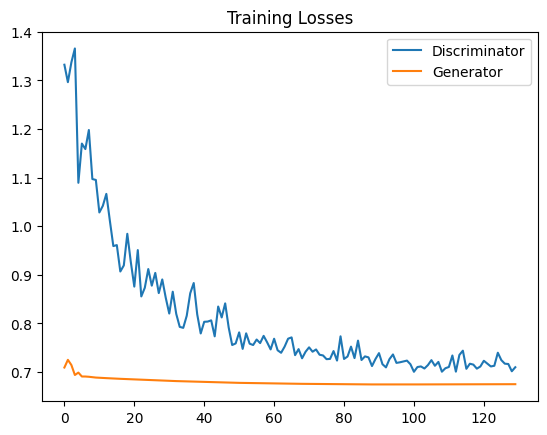

In [73]:
fig, ax = plt.subplots()
plt.plot(discriminator_loss, label='Discriminator')
plt.plot(gan_loss, label='Generator')
plt.title("Training Losses")
plt.legend()

In [74]:
# Predictions on the test set

nr_batches_test = np.ceil(x_test.shape[0] // batch_size).astype(np.int32)

results =[]

for t in range(nr_batches_test +1):    
        ran_from = t * batch_size
        ran_to = (t + 1) * batch_size
        image_batch = x_test[ran_from:ran_to]             
        tmp_rslt = discriminator.predict(x=image_batch,batch_size=128,verbose=0)        
        results = np.append(results, tmp_rslt)   

In [75]:
results

array([0.50923288, 0.50923288, 0.50923288, ..., 0.50923288, 0.50923288,
       0.50923288])

In [76]:
y2 = y_test.to_numpy()

In [77]:
pd.options.display.float_format = '{:20,.7f}'.format
results_df = pd.concat([pd.DataFrame(results),pd.DataFrame(y2)], axis=1)
results_df.columns = ['results','y_test']
print ('Mean score for Normal data :', results_df.loc[results_df['y_test'] == 1, 'results'].mean() )
print ('Mean score for Fall data :', results_df.loc[results_df['y_test'] == 0, 'results'].mean())

Mean score for Normal data : 0.5092328786849976
Mean score for Fall data : 0.5092328786849976


In [78]:
#Obtaining the lowest 1% score
per = np.percentile(results,1)
y_pred = results.copy()
y_pred = np.array(y_pred)

#Thresholding based on the score
inds = (y_pred > per)
inds_comp = (y_pred <= per)
y_pred[inds] = 0
y_pred[inds_comp] = 1

In [79]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

precision, recall, f1,_ = precision_recall_fscore_support(y_test,y_pred,average='binary')
print ('Accuracy Score :',accuracy_score(y_test, y_pred) )
print ('Precision :',precision )
print ('Recall :',recall )
print ('F1 :',f1 )

Accuracy Score : 0.4968888888888889
Precision : 0.4968888888888889
Recall : 1.0
F1 : 0.663895486935867


Confusion Matrix :


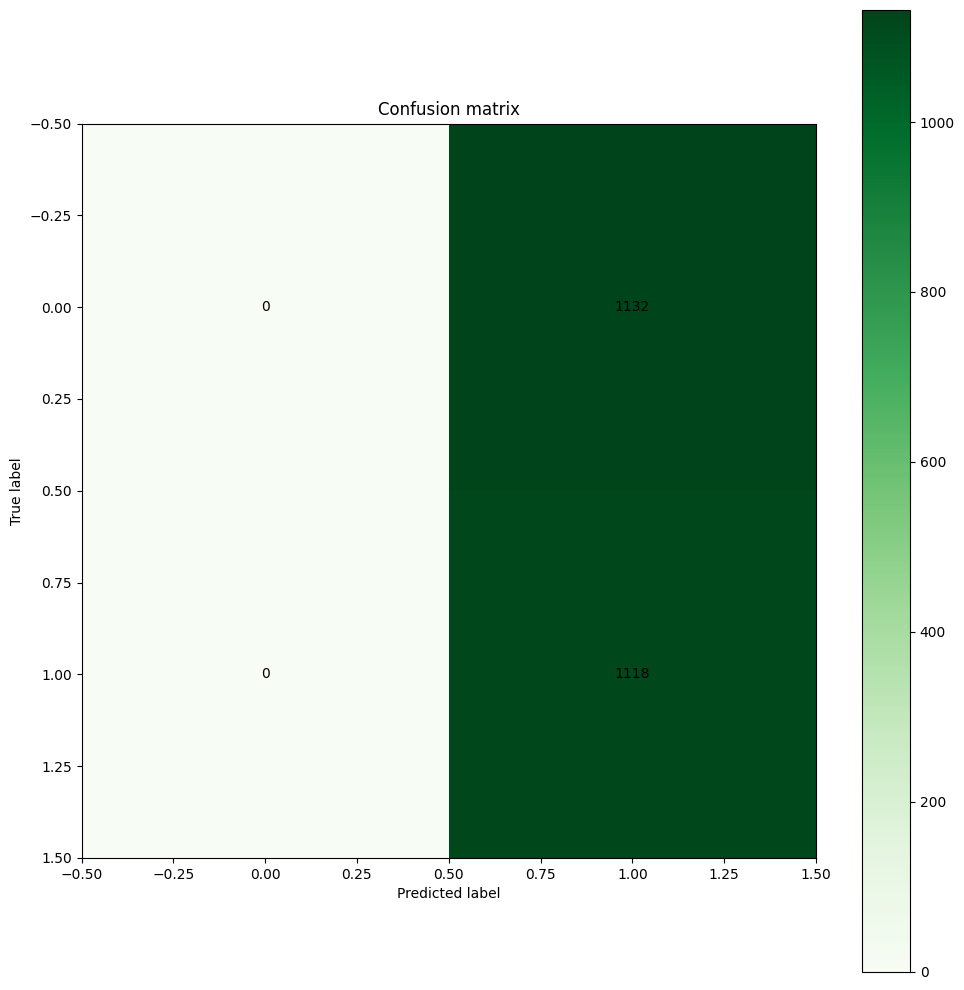

In [80]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print ('Confusion Matrix :')

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greens):
    plt.figure(figsize=(10,10),)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(cm)